## Import Library


In [1]:

import cv2
import matplotlib.pyplot as plt 
import numpy as np

## Membaca Data Gambar

In [2]:
img = cv2.imread("AL.jpeg")

In [3]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

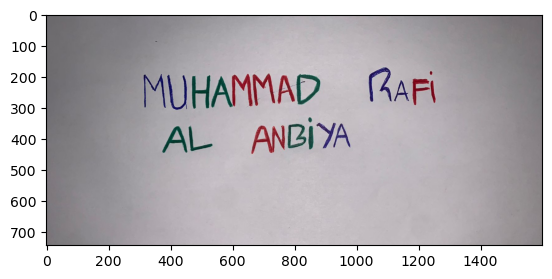

In [4]:
plt.imshow(rgb)

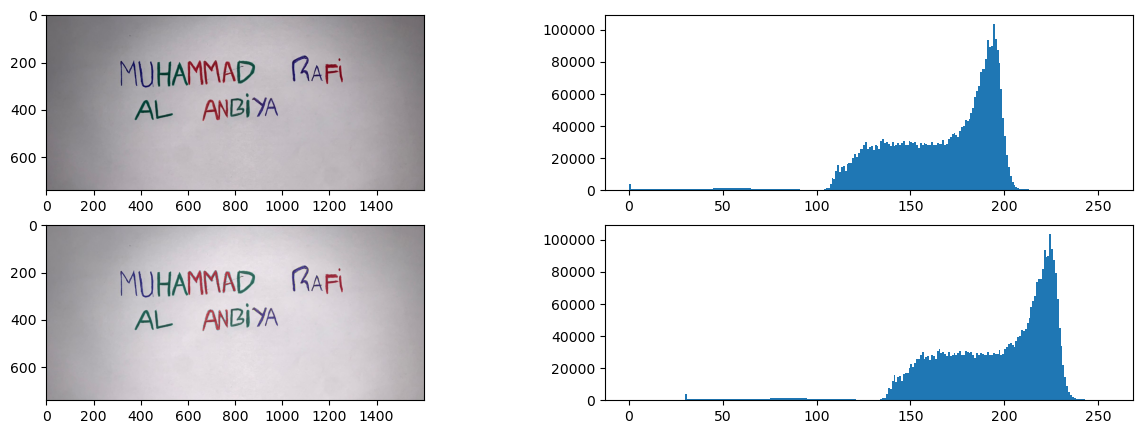

In [5]:
(baris, kolom)= rgb.shape[:2]

beta = 30 #bias untuk kecerahan
citra_cerah = np.zeros((baris, kolom, 3)) #np zeros = mengubah semua elemen array menjadi 0
 
for x in range(baris) :
    for y in range(kolom) :
        gyx = rgb[x,y] + beta
        citra_cerah[x,y] = gyx
citra_cerah = citra_cerah.astype(np.uint8)
 
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(rgb)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(),256,[0,256])
plt.show()

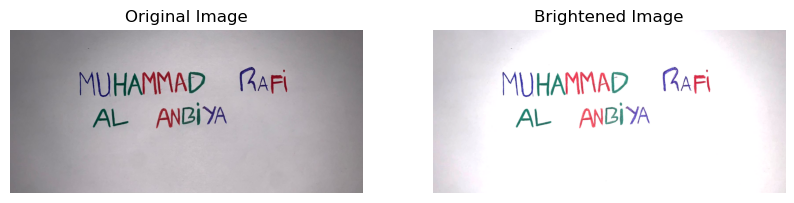

In [6]:
# 2. Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Adjust Contrast and Brightness
alpha = 1.5  # kontras
beta = 30    # kecerahan
adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# 4. Display Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Brightened Image')
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

## Mendeteksi RGB

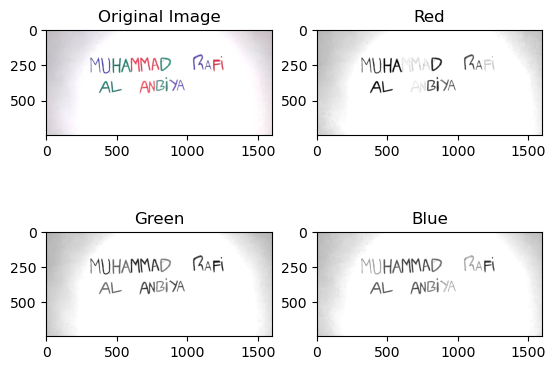

In [7]:
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Display the red channel
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)[:,:,0], cmap="gray")
plt.title('Red')

# Display the green channel
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)[:,:,1], cmap="gray")
plt.title('Green')

# Display the blue channel
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)[:,:,2], cmap="gray")
plt.title('Blue')

plt.show()

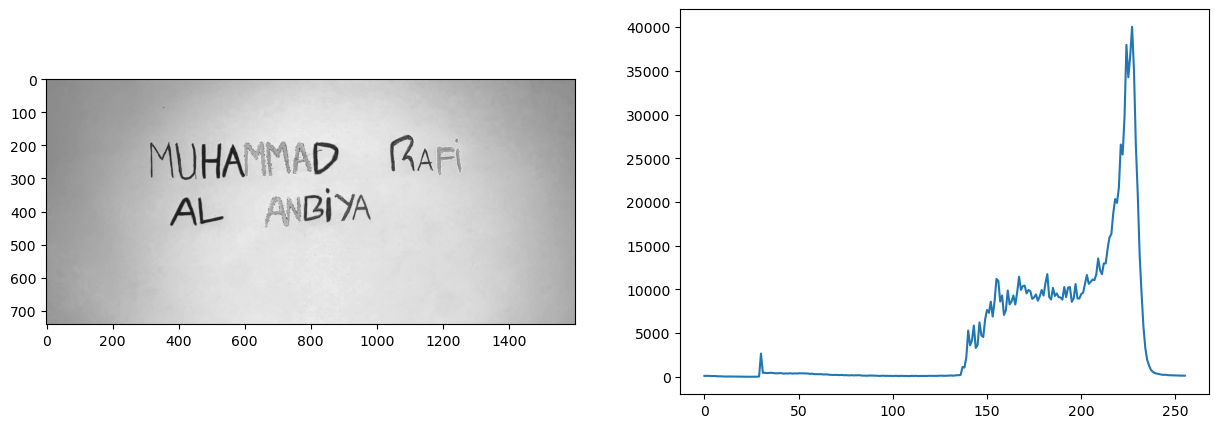

In [8]:
merah=citra_cerah[:,:,0] #Merah
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([merah],[0],None,[256],[0,256])
axs[0].imshow(merah, cmap='gray')
axs[1].plot(hist)
plt.show()

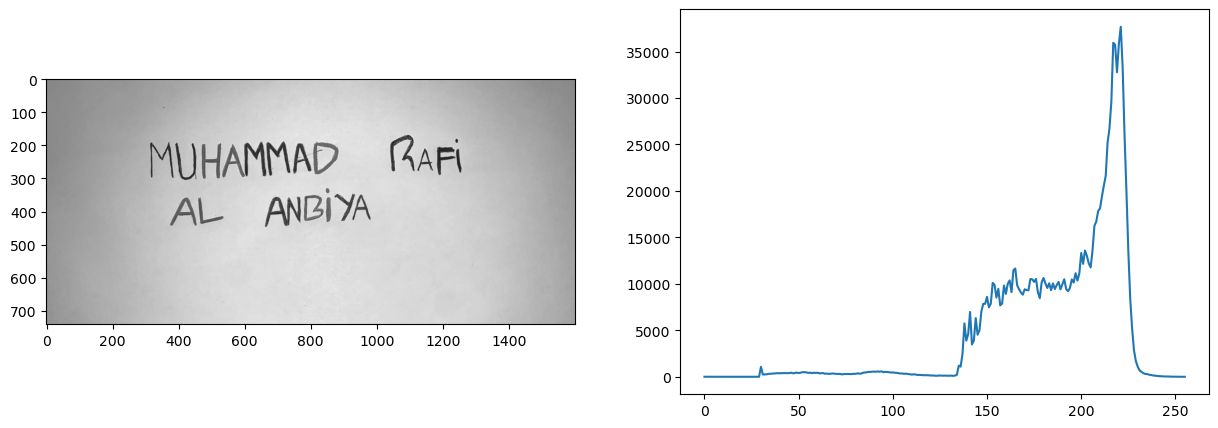

In [9]:
hijau=citra_cerah[:,:,1] #hijau
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([hijau],[0],None,[256],[0,256])
axs[0].imshow(hijau, cmap='gray')
axs[1].plot(hist)
plt.show()

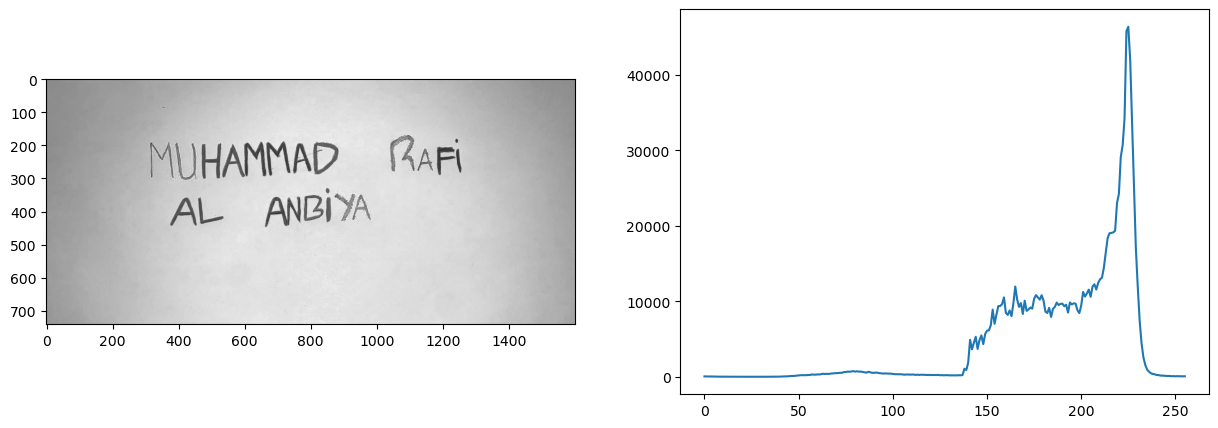

In [10]:
biru=citra_cerah[:,:,2] #biru
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([biru],[0],None,[256],[0,256])
axs[0].imshow(biru, cmap='gray')
axs[1].plot(hist)
plt.show()

## Ambang Batasnyaa


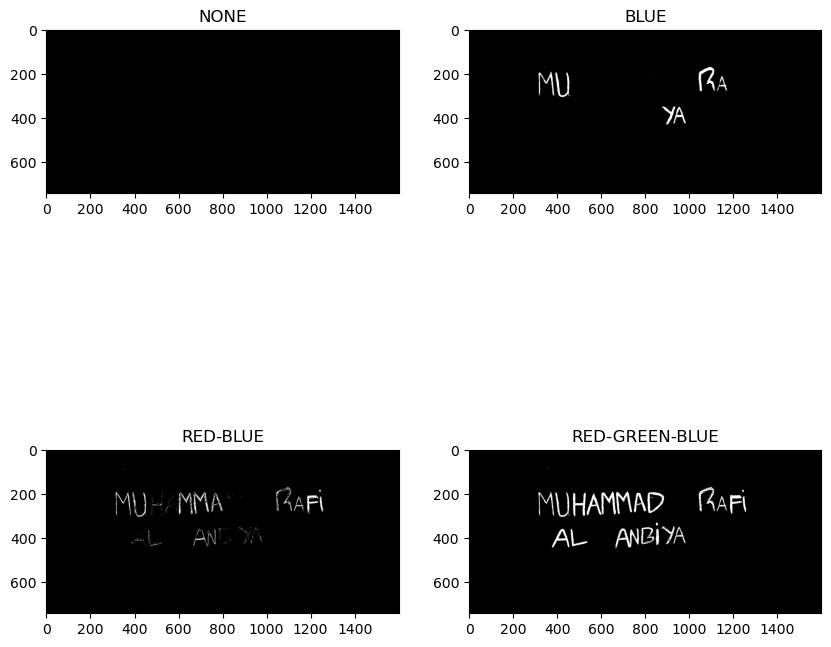

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread('AL.jpeg')
# Convert citra ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Inisialisasi subplot
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Ambang batas untuk mendapatkan citra biner (none)
(thresh, binary1) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

# Convert citra ke HSV
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definisikan range warna biru dalam HSV
blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])

# Membuat mask untuk warna biru
mask_blue = cv2.inRange(image_hsv, blue_lower, blue_upper)
axs[0,1].imshow(mask_blue, cmap='gray')
axs[0,1].set_title('BLUE')

# Ambang batas untuk mendapatkan citra biner (red-blue)
(thresh, binary3) = cv2.threshold(gray, 42, 255, cv2.THRESH_BINARY)
axs[1,0].imshow(binary3, cmap = 'binary')
axs[1,0].set_title('RED-BLUE')

# Ambang batas untuk mendapatkan citra biner (red-green-blue)
(thresh, binary4) = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
axs[1,1].imshow(binary4, cmap = 'binary')
axs[1,1].set_title('RED-GREEN-BLUE')

plt.show()
